# Ortodromski problem (Great circle)

**author**: *aleksander.grm@fpp.uni-lj.si*,<br>
**date**: 2022

Pri analizi ortodromske plovbe ločimo v osnovi **dva** problema
- določitev razdalje $D_O$, kurza odhoda $\omega_0$ in položaja vrha $P_v$
- določitev položajev medtočk $P_m$ za plovbo po vmesnih loksodromah

Za oba problema si poglejmo izračun parametrov. V prvem primeru določimo vse parametre ortodrome in eno vmesno točko. V drugem primeru pa izračunamo vse vmesne točke in določimo razdaljo po loksodromah. Za oba primera še izrišemo potek plovbe.

Položaje vnašama v obliki, kot je v navtiki dogovor 

$\varphi = \#\#^\circ \, \#\#.\#' \, \mathrm{N/S}$, $\lambda = \#\#\#^\circ \, \#\#.\#' \, \mathrm{E/W}$, 

kjer imamo stopinje kot celo število in minute kot število na 1 decimalno mesto natančno.

Format vnosa položaja:
- LAT-$\varphi$ in LONG-$\lambda$ vnašamo v formatu [stopinje, minute, stran neba]

Primer vnosa položaja:
- $\varphi$: [12, 34.5, 'N']
- $\lambda$: [117, 12.6, 'W']
- stran neba mora biti v **enojnih navednicah**, kjer so dovoljeni znaki 'N', 'S', 'E', 'W'

In [19]:
# Nalaganje paketi za izračun loksodromoske plovbe
import os, sys

# nav tools path
sys.path.append('../nav_tools')

# needed by basemap
os.environ['PROJ_LIB'] = '/opt/miniconda3/envs/astrolab/share/proj'

In [19]:
import numpy as np
import navtools as nt
import rhumbline as rl
import greatcircle as gc

### Primer 1

In [20]:
# Položaj odhoda
fi0 = [41,0,'N']
la0 = [14,0,'E']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [41,0,'N']
la1 = [73,0,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=41°00.00′N; λ=014°00.00′E
  arrival: φ=41°00.00′N; λ=073°00.00′W
----------------
distance: 3755.9Nm
  course: 301.91°
  vertex: φ=50°09.41′N; λ=029°30.00′W


In [21]:
# izračun posamezne medtočke
la_md = nt.nav2dd([30,15,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=50°09.26′N; λ=030°15.00′W


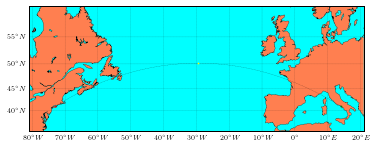

In [22]:
# izris ortodrome
Pm = gc.getMidPoints(P0, P1, 1)
P_gc = np.concatenate(([P0],Pm,[P1]))
nt.plotGCPath(P_gc,Pv,5,10,'gc_path_01.pdf')

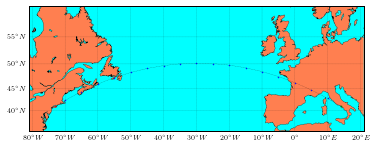

p[00]: φ=41°00.00′N; λ=014°00.00′E
p[01]: φ=42°45.60′N; λ=010°00.00′E; ω=300.6°; d=207.5Nm
p[02]: φ=44°38.61′N; λ=005°00.00′E; ω=297.5°; d=244.5Nm
p[03]: φ=46°12.40′N; λ=000°00.00′W; ω=294.0°; d=230.5Nm
p[04]: φ=47°28.72′N; λ=005°00.00′W; ω=290.4°; d=218.9Nm
p[05]: φ=48°29.04′N; λ=010°00.00′W; ω=286.7°; d=209.7Nm
p[06]: φ=49°14.51′N; λ=015°00.00′W; ω=283.0°; d=202.5Nm
p[07]: φ=49°46.02′N; λ=020°00.00′W; ω=279.2°; d=197.3Nm
p[08]: φ=50°04.18′N; λ=025°00.00′W; ω=275.4°; d=194.0Nm
p[09]: φ=50°09.34′N; λ=030°00.00′W; ω=271.5°; d=192.5Nm
p[10]: φ=50°01.60′N; λ=035°00.00′W; ω=267.7°; d=192.6Nm
p[11]: φ=49°40.81′N; λ=040°00.00′W; ω=263.9°; d=194.5Nm
p[12]: φ=49°06.56′N; λ=045°00.00′W; ω=260.1°; d=198.2Nm
p[13]: φ=48°18.20′N; λ=050°00.00′W; ω=256.3°; d=203.8Nm
p[14]: φ=47°14.78′N; λ=055°00.00′W; ω=252.5°; d=211.3Nm
p[15]: φ=45°55.09′N; λ=060°00.00′W; ω=248.9°; d=221.0Nm
p[16]: φ=44°17.60′N; λ=065°00.00′W; ω=245.3°; d=233.1Nm
p[17]: φ=42°20.52′N; λ=070°00.00′W; ω=241.8°; d=247.7Nm
p[18]: φ=41°0

In [23]:
# izris ortodrome v loksodromah
dla = 5 # vmesene točke na 5 stopinj
Pm = gc.getMidPoints(P0, P1, dla)
P_gc = np.concatenate(([P0],Pm,[P1]))
nt.plotGCRLPath(P_gc,5,10,'gc_RL-path_01.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))

### Primer 2

In [6]:
# Položaj odhoda
fi0 = [50,55,'N']
la0 = [7,32,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
# fi1 = [42,26,'N']
# la1 = [70,16,'W']
fi1 = [45,45,'N']
la1 = [53,24,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=50°55.00′N; λ=007°32.00′W
  arrival: φ=45°45.00′N; λ=053°24.00′W
----------------
distance: 1825.1Nm
  course: 278.45°
  vertex: φ=51°25.22′N; λ=018°22.30′W


In [7]:
# izračun posamezne medtočke
la_md = nt.nav2dd([45,34.2,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=48°06.71′N; λ=045°34.20′W


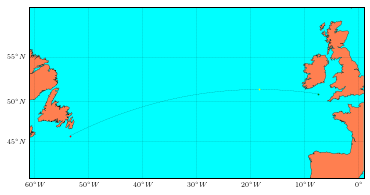

In [8]:
# izris ortodrome
Pm = gc.getMidPoints(P0, P1, 1)
P_gc = np.concatenate(([P0],Pm,[P1]))
nt.plotGCPath(P_gc,Pv,5,10,'gc_path_02.pdf')

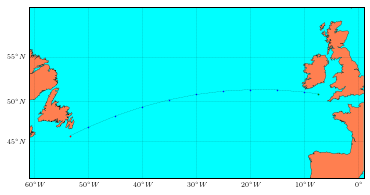

p[00]: φ=50°55.00′N; λ=007°32.00′W
p[01]: φ=51°07.25′N; λ=010°00.00′W; ω=277.5°; d=93.9Nm
p[02]: φ=51°22.32′N; λ=015°00.00′W; ω=274.6°; d=188.4Nm
p[03]: φ=51°24.55′N; λ=020°00.00′W; ω=270.7°; d=187.2Nm
p[04]: φ=51°13.98′N; λ=025°00.00′W; ω=266.8°; d=187.8Nm
p[05]: φ=50°50.39′N; λ=030°00.00′W; ω=262.9°; d=190.1Nm
p[06]: φ=50°13.31′N; λ=035°00.00′W; ω=259.0°; d=194.3Nm
p[07]: φ=49°21.98′N; λ=040°00.00′W; ω=255.2°; d=200.3Nm
p[08]: φ=48°15.34′N; λ=045°00.00′W; ω=251.4°; d=208.5Nm
p[09]: φ=46°52.03′N; λ=050°00.00′W; ω=247.6°; d=218.9Nm
p[10]: φ=45°45.00′N; λ=053°24.00′W; ω=244.6°; d=156.0Nm

distance-RL: 1825.4Nm; diff: 0.3Nm


In [9]:
# izris ortodrome v loksodromah
dla = 5 # vmesene točke na 5 stopinj
Pm = gc.getMidPoints(P0, P1, dla)
P_gc = np.concatenate(([P0],Pm,[P1]))
nt.plotGCRLPath(P_gc,5,10,'gc_RL-path_02.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))

### Primer 3

In [10]:
# Položaj odhoda
fi0 = [32,33.6,'N']
la0 = [13,34.8,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [63,24.5,'S']
la1 = [72,22.3,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=32°33.60′N; λ=013°34.80′W
  arrival: φ=63°24.50′S; λ=072°22.30′W
----------------
distance: 6396.3Nm
  course: 203.55°
  vertex: φ=70°19.37′S; λ=116°46.78′W


In [11]:
# izračun posamezne medtočke
la_md = nt.nav2dd([45,34.2,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=42°00.63′S; λ=045°34.20′W


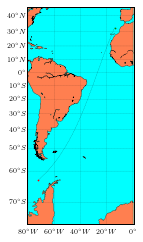

In [12]:
# izris ortodrome
Pm = gc.getMidPoints(P0, P1, 1)
P_gc = np.concatenate(([P0],Pm,[P1]))
nt.plotGCPath(P_gc,Pv,10,20,'gc_path_03.pdf')

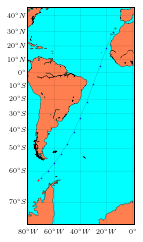

p[00]: φ=32°33.60′N; λ=013°34.80′W
p[01]: φ=29°43.27′N; λ=015°00.00′W; ω=203.2°; d=185.3Nm
p[02]: φ=18°16.14′N; λ=020°00.00′W; ω=201.7°; d=739.5Nm
p[03]: φ=04°57.80′N; λ=025°00.00′W; ω=200.2°; d=850.5Nm
p[04]: φ=08°55.66′S; λ=030°00.00′W; ω=199.7°; d=885.5Nm
p[05]: φ=21°47.58′S; λ=035°00.00′W; ω=200.5°; d=824.1Nm
p[06]: φ=32°36.00′S; λ=040°00.00′W; ω=202.3°; d=700.9Nm
p[07]: φ=41°09.90′S; λ=045°00.00′W; ω=205.0°; d=567.0Nm
p[08]: φ=47°47.51′S; λ=050°00.00′W; ω=208.3°; d=451.4Nm
p[09]: φ=52°54.10′S; λ=055°00.00′W; ω=211.9°; d=361.3Nm
p[10]: φ=56°51.99′S; λ=060°00.00′W; ω=215.9°; d=293.8Nm
p[11]: φ=59°58.32′S; λ=065°00.00′W; ω=220.1°; d=243.6Nm
p[12]: φ=62°25.60′S; λ=070°00.00′W; ω=224.4°; d=206.3Nm
p[13]: φ=63°24.50′S; λ=072°22.30′W; ω=227.7°; d=87.6Nm

distance-RL: 6396.8Nm; diff: 0.5Nm


In [13]:
# izris ortodrome v loksodromah
dla = 5 # vmesene točke na 5 stopinj
Pm = gc.getMidPoints(P0, P1, dla)
P_gc = np.concatenate(([P0],Pm,[P1]))
nt.plotGCRLPath(P_gc,10,20,'gc_RL-path_03.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))